<a href="https://colab.research.google.com/github/bharaniakella/100xdl/blob/main/multi_layer_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

In [28]:
A=[1,1]
B=[5,1]
blur=1
n_clust=100
a=[A[0]+np.random.randn(n_clust)*blur,A[1]+np.random.randn(n_clust)*blur]
b=[B[0]+np.random.randn(n_clust)*blur,B[1]+np.random.randn(n_clust)*blur]
data_np=np.hstack((a,b))
labels_np=np.vstack((np.zeros((n_clust,1)),np.ones((n_clust,1))))
data_np=data_np.T

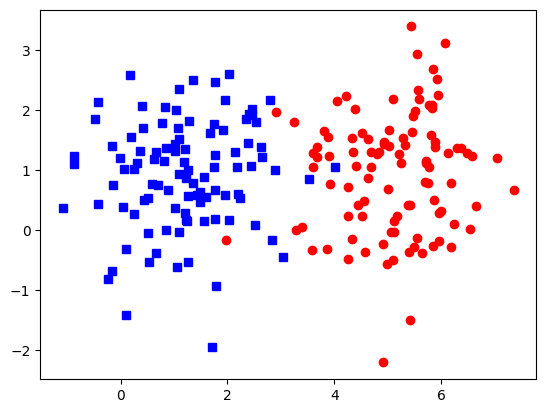

In [29]:
plt.plot(data_np[0:100,0],data_np[0:100,1],'bs')
plt.plot(data_np[100:,0],data_np[100:,1],'ro')
plt.show()

In [30]:
data=torch.tensor(data_np).float()
labels=torch.tensor(labels_np).float()

In [31]:
def create_model():
  ann_multi=nn.Sequential(
      nn.Linear(2,16),
      nn.ReLU(),
      nn.Linear(16,16),
      nn.ReLU(),
      nn.Linear(16,1),
      nn.Sigmoid()
  )
  lr=0.05
  loss_fun=nn.BCELoss()
  optimizer=torch.optim.SGD(ann_multi.parameters(),lr=lr)
  return ann_multi, loss_fun, optimizer

In [32]:
num_epochs=500
def train_model(ann_multi):
  losses=torch.zeros(num_epochs)

  for epochi in range(num_epochs):
    yhat=ann_multi(data)
    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ann_multi(data)
  final_acc=100*torch.mean(((predictions>0.5)==labels).float())
  return losses, predictions, final_acc

In [33]:
ann_multi, loss_fun, optimizer=create_model()
losses, predictions, final_acc=train_model(ann_multi)

In [34]:
final_acc

tensor(97.5000)

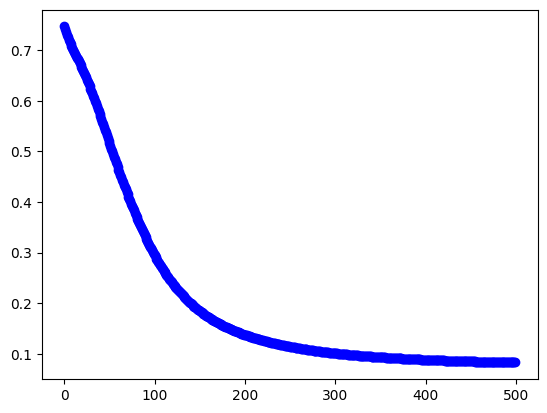

In [35]:
plt.plot(losses.detach(),'bo')
plt.show()